# Mnist dataset CNN using Adam optimizer with validation method

In [2]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPooling2D, Flatten, Dense

In [6]:
# read the data
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [7]:
# 1) Split it into a training (5/7), a validation (1/7), and a test (1/7) set.
X_train, y_train = X_train_full[:-10000]/255., y_train_full[:-10000]
X_valid, y_valid = X_train_full[-10000:]/255., y_train_full[-10000:]
X_test = X_test/255.

In [8]:
# reshape the input data to 28,28,1
X_train = X_train.reshape((-1, 28, 28, 1))
X_valid = X_valid.reshape((-1, 28, 28, 1))
X_test = X_test.reshape((-1, 28, 28, 1))

In [9]:
# fix the random numbers generator
tf.random.set_seed(42)

In [ ]:
# 2) Built a convolutional neural network (CNN). For the features extractor part of the CNN, create three
#2D convolutional layers with 3x3 kernels, where each one of the first two is followed by a 2x2 max polling
#layer. For the classification part of your model use two fully connected layers (the second one should be
#the output layer).

model = Sequential()
model.add(Conv2D(16, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          18496     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [ ]:
# 3) Compile the model using the Adam optimizer, a loss function of your choice and add accuracy to your
#metrics

model.compile(optimizer="Adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])# 3) Compile the model using the Adam optimizer, a loss function of your choice and add accuracy to your
#metrics

model.compile(optimizer="Adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
#4) Fit the model on the training data (allow 100 epochs) and use early stopping with patience 5 epochs
#to monitor the validation set

early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                  patience=5,
                                                  restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100, batch_size = 32,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping])

Epoch 1/100
1563/1563 [==============================] - 33s 20ms/step - loss: 0.1669 - accuracy: 0.9487 - val_loss: 0.0558 - val_accuracy: 0.9838
Epoch 2/100
1563/1563 [==============================] - 31s 20ms/step - loss: 0.0533 - accuracy: 0.9830 - val_loss: 0.0479 - val_accuracy: 0.9856
Epoch 3/100
1563/1563 [==============================] - 31s 20ms/step - loss: 0.0373 - accuracy: 0.9879 - val_loss: 0.0456 - val_accuracy: 0.9876
Epoch 4/100
1563/1563 [==============================] - 31s 20ms/step - loss: 0.0288 - accuracy: 0.9912 - val_loss: 0.0469 - val_accuracy: 0.9882
Epoch 5/100
1563/1563 [==============================] - 30s 19ms/step - loss: 0.0235 - accuracy: 0.9924 - val_loss: 0.0505 - val_accuracy: 0.9851
Epoch 6/100
1563/1563 [==============================] - 30s 19ms/step - loss: 0.0190 - accuracy: 0.9938 - val_loss: 0.0416 - val_accuracy: 0.9903
Epoch 7/100
1563/1563 [==============================] - 32s 20ms/step - loss: 0.0168 - accuracy: 0.9946 - val_loss: 0

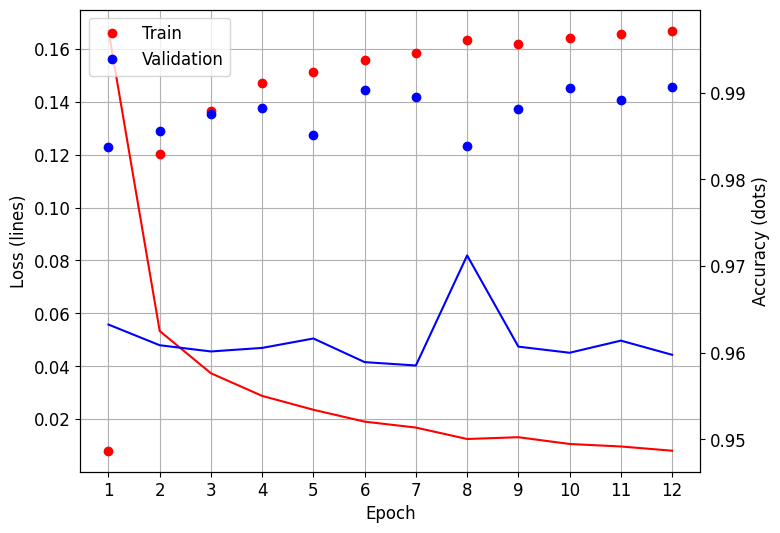

In [ ]:
#5) Plot the history of the loss and accuracy of the training process for the training and the validation set.

x_values = range(1, len(history.history['loss'])+1)
fig, ax = plt.subplots(figsize = (8,6))
ax.plot(x_values, history.history['loss'], "r-", label = "Train loss")
ax.plot(x_values, history.history['val_loss'], "b-", label = "Validation loss")
ax.set_ylabel("Loss (lines)")
ax.set_xlabel("Epoch")
ax.grid()

ax1 = ax.twinx()

ax1.plot(x_values, history.history['accuracy'], "ro", label = "Train")
ax1.plot(x_values, history.history['val_accuracy'], "bo", label = "Validation")
ax1.set_ylabel("Accuracy (dots)")

plt.xticks(x_values)
plt.legend()
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\nThe accuracy on the test set is: {100*test_accuracy:.1f}%")

313/313 [==============================] - 3s 10ms/step - loss: 0.0323 - accuracy: 0.9909

The accuracy on the test set is: 99.1%


In [ ]:
#Second configuration of 32, 64 and 128 kernels/filters

tf.random.set_seed(42)

# create a sequantial model of an input, three convolutional hidden and an output layer
model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 flatten_1 (Flatten)         (None, 1152)             

In [ ]:
# compile the model
model.compile(optimizer="Adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                  patience=5,
                                                  restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100, batch_size = 32,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping])

Epoch 1/100
1563/1563 [==============================] - 64s 40ms/step - loss: 0.1418 - accuracy: 0.9559 - val_loss: 0.0596 - val_accuracy: 0.9819
Epoch 2/100
1563/1563 [==============================] - 58s 37ms/step - loss: 0.0439 - accuracy: 0.9858 - val_loss: 0.0397 - val_accuracy: 0.9872
Epoch 3/100
1563/1563 [==============================] - 55s 35ms/step - loss: 0.0316 - accuracy: 0.9903 - val_loss: 0.0400 - val_accuracy: 0.9881
Epoch 4/100
1563/1563 [==============================] - 58s 37ms/step - loss: 0.0243 - accuracy: 0.9921 - val_loss: 0.0356 - val_accuracy: 0.9912
Epoch 5/100
1563/1563 [==============================] - 58s 37ms/step - loss: 0.0187 - accuracy: 0.9937 - val_loss: 0.0420 - val_accuracy: 0.9883
Epoch 6/100
1563/1563 [==============================] - 55s 35ms/step - loss: 0.0151 - accuracy: 0.9953 - val_loss: 0.0475 - val_accuracy: 0.9885
Epoch 7/100
1563/1563 [==============================] - 55s 35ms/step - loss: 0.0122 - accuracy: 0.9959 - val_loss: 0

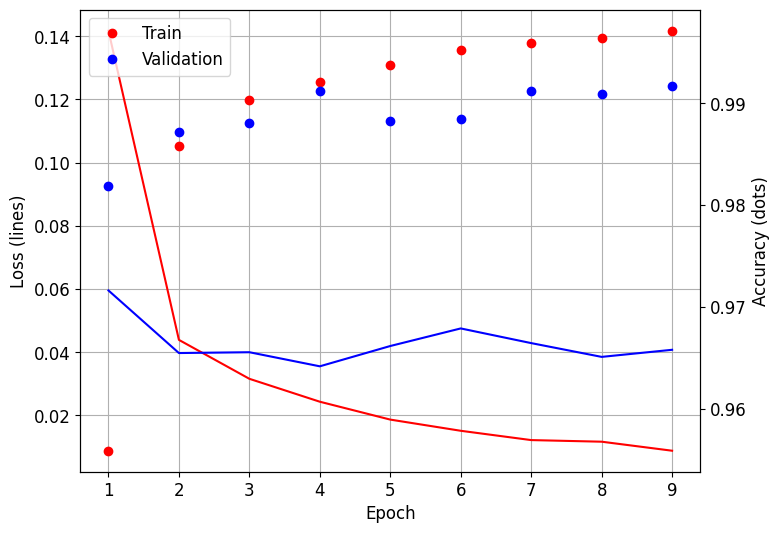

In [ ]:
x_values = range(1, len(history.history['loss'])+1)
fig, ax = plt.subplots(figsize = (8,6))
ax.plot(x_values, history.history['loss'], "r-", label = "Train loss")
ax.plot(x_values, history.history['val_loss'], "b-", label = "Validation loss")
ax.set_ylabel("Loss (lines)")
ax.set_xlabel("Epoch")
ax.grid()

ax1 = ax.twinx()

ax1.plot(x_values, history.history['accuracy'], "ro", label = "Train")
ax1.plot(x_values, history.history['val_accuracy'], "bo", label = "Validation")
ax1.set_ylabel("Accuracy (dots)")

plt.xticks(x_values)
plt.legend()
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\nThe accuracy on the test set is: {100*test_accuracy:.1f}%")

313/313 [==============================] - 4s 11ms/step - loss: 0.0264 - accuracy: 0.9912

The accuracy on the test set is: 99.1%


In [3]:
# Extra cases, #2D convolutional layers with 4x4 kernels, where each one of the first two is followed by a 2x2 max polling
#layer. For the classification part of your model use two fully connected layers (the second one should be
#the output layer)

tf.random.set_seed(42)

model = Sequential()
model.add(Conv2D(16, (4, 4), activation = 'relu', input_shape = (28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (4, 4), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (4, 4), activation = 'relu'))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [4]:
# compile the model
model.compile(optimizer="Adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [10]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                  patience=5,
                                                  restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100, batch_size = 32,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping])

Epoch 1/100
1563/1563 [==============================] - 31s 19ms/step - loss: 0.1963 - accuracy: 0.9384 - val_loss: 0.0659 - val_accuracy: 0.9800
Epoch 2/100
1563/1563 [==============================] - 29s 18ms/step - loss: 0.0641 - accuracy: 0.9801 - val_loss: 0.0551 - val_accuracy: 0.9839
Epoch 3/100
1563/1563 [==============================] - 29s 18ms/step - loss: 0.0435 - accuracy: 0.9867 - val_loss: 0.0446 - val_accuracy: 0.9868
Epoch 4/100
1563/1563 [==============================] - 29s 19ms/step - loss: 0.0327 - accuracy: 0.9902 - val_loss: 0.0428 - val_accuracy: 0.9886
Epoch 5/100
1563/1563 [==============================] - 29s 19ms/step - loss: 0.0278 - accuracy: 0.9911 - val_loss: 0.0528 - val_accuracy: 0.9844
Epoch 6/100
1563/1563 [==============================] - 29s 18ms/step - loss: 0.0228 - accuracy: 0.9926 - val_loss: 0.0446 - val_accuracy: 0.9873
Epoch 7/100
1563/1563 [==============================] - 28s 18ms/step - loss: 0.0182 - accuracy: 0.9942 - val_loss: 0

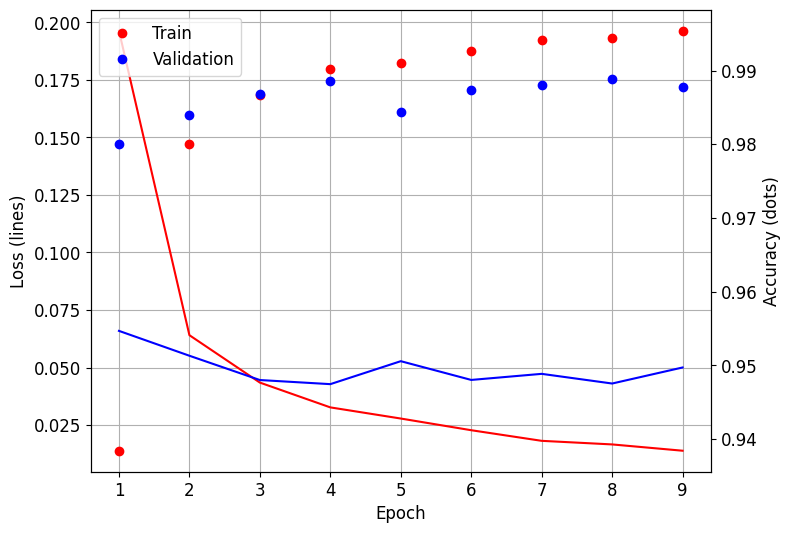

In [11]:
x_values = range(1, len(history.history['loss'])+1)
fig, ax = plt.subplots(figsize = (8,6))
ax.plot(x_values, history.history['loss'], "r-", label = "Train loss")
ax.plot(x_values, history.history['val_loss'], "b-", label = "Validation loss")
ax.set_ylabel("Loss (lines)")
ax.set_xlabel("Epoch")
ax.grid()

ax1 = ax.twinx()

ax1.plot(x_values, history.history['accuracy'], "ro", label = "Train")
ax1.plot(x_values, history.history['val_accuracy'], "bo", label = "Validation")
ax1.set_ylabel("Accuracy (dots)")

plt.xticks(x_values)
plt.legend()
plt.show()

In [12]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\nThe accuracy on the test set is: {100*test_accuracy:.1f}%")

313/313 [==============================] - 2s 6ms/step - loss: 0.0337 - accuracy: 0.9902

The accuracy on the test set is: 99.0%


In [14]:
# Extra cases, #2D convolutional layers with 5x5 kernels, where each one of the first two is followed by a 2x2 max polling
#layer. For the classification part of your model use two fully connected layers (the second one should be
#the output layer)

tf.random.set_seed(42)

model = Sequential()
model.add(Conv2D(16, (5, 5), activation = 'relu', input_shape = (28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (5, 5), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (4, 4), activation = 'relu'))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [15]:
# compile the model
model.compile(optimizer="Adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [16]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                  patience=5,
                                                  restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100, batch_size = 32,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping])

Epoch 1/100
1563/1563 [==============================] - 38s 23ms/step - loss: 0.1890 - accuracy: 0.9407 - val_loss: 0.0704 - val_accuracy: 0.9797
Epoch 2/100
1563/1563 [==============================] - 34s 22ms/step - loss: 0.0579 - accuracy: 0.9818 - val_loss: 0.0658 - val_accuracy: 0.9800
Epoch 3/100
1563/1563 [==============================] - 33s 21ms/step - loss: 0.0418 - accuracy: 0.9871 - val_loss: 0.0451 - val_accuracy: 0.9871
Epoch 4/100
1563/1563 [==============================] - 34s 22ms/step - loss: 0.0315 - accuracy: 0.9899 - val_loss: 0.0395 - val_accuracy: 0.9900
Epoch 5/100
1563/1563 [==============================] - 33s 21ms/step - loss: 0.0267 - accuracy: 0.9916 - val_loss: 0.0377 - val_accuracy: 0.9887
Epoch 6/100
1563/1563 [==============================] - 34s 21ms/step - loss: 0.0205 - accuracy: 0.9936 - val_loss: 0.0476 - val_accuracy: 0.9878
Epoch 7/100
1563/1563 [==============================] - 34s 21ms/step - loss: 0.0175 - accuracy: 0.9945 - val_loss: 0

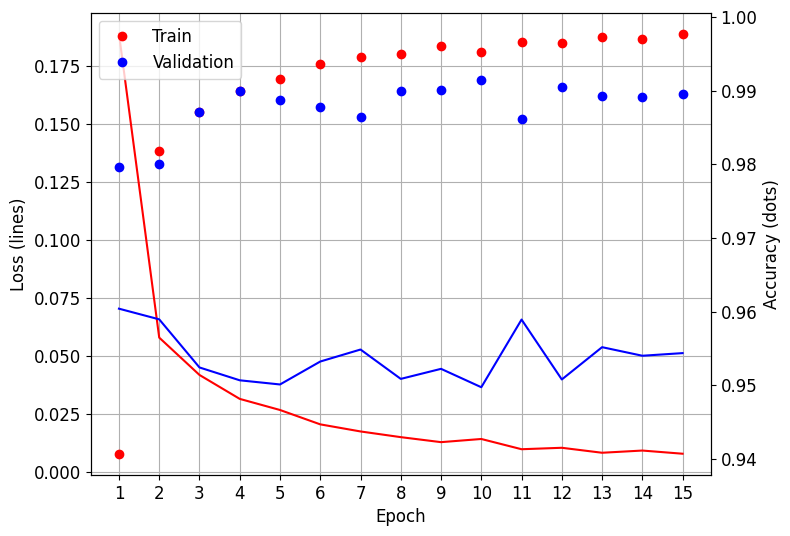

In [17]:
x_values = range(1, len(history.history['loss'])+1)
fig, ax = plt.subplots(figsize = (8,6))
ax.plot(x_values, history.history['loss'], "r-", label = "Train loss")
ax.plot(x_values, history.history['val_loss'], "b-", label = "Validation loss")
ax.set_ylabel("Loss (lines)")
ax.set_xlabel("Epoch")
ax.grid()

ax1 = ax.twinx()

ax1.plot(x_values, history.history['accuracy'], "ro", label = "Train")
ax1.plot(x_values, history.history['val_accuracy'], "bo", label = "Validation")
ax1.set_ylabel("Accuracy (dots)")

plt.xticks(x_values)
plt.legend()
plt.show()

In [18]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\nThe accuracy on the test set is: {100*test_accuracy:.1f}%")

313/313 [==============================] - 2s 7ms/step - loss: 0.0308 - accuracy: 0.9913

The accuracy on the test set is: 99.1%
